In [185]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_4types

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [186]:
base_file_loc = '/home/belle2/jaeyoung/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT'
base_file_loc = '/share/storage/jykim/storage_b2/storage/reduced_ntuples/b2bii/etapip_eteeta/belle_etaetapip_loose_v0_240909_Kp_BCS_etapi0const_ipprofile'

In [165]:
!ls /share/storage/jykim/storage_b2/storage/reduced_ntuples/b2bii/etapip_eteeta/belle_etaetapip_loose_v0_240909_Kp_BCS_etapi0const_ipprofile

belle_etaetapip_loose_v0_240909_Kp_BCS_etapi0const_ipprofile_charged.root
belle_etaetapip_loose_v0_240909_Kp_BCS_etapi0const_ipprofile_charm.root
belle_etaetapip_loose_v0_240909_Kp_BCS_etapi0const_ipprofile_mixed.root
belle_etaetapip_loose_v0_240909_Kp_BCS_etapi0const_ipprofile_uds.root


In [166]:
!ls /home/belle2/jaeyoung/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT

ls: '/home/belle2/jaeyoung/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT'에 접근할 수 없습니다: 그런 파일이나 디렉터리가 없습니다


In [187]:
# generic_ccbar = base_file_loc + 'ccbar/tight_v2_240827_roe_Dptag_ccbar_output_00*.root'

generic_ccbar = base_file_loc + '/*charm.root'

# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

generic_uubar = base_file_loc + '/*uds.root'
# generic_ddbar = base_file_loc + '/*ddbar.root'
# generic_ssbar = base_file_loc + '/*ssbar.root'
generic_charged = base_file_loc + '/*charged.root'
generic_mixed = base_file_loc + '/*mixed.root'
# generic_taupair = base_file_loc + '/*taupair.root'

In [188]:
base_filter=' Dp_M>0'
# base_filter='etapip_gg_rank==1'
# base_filter+= '  && bdt>0.4'

# base_filter += ' && ((etapip_gamma1_clusterReg==1 && etapip_gamma1_E>0.05) || (etapip_gamma1_clusterReg==3 && etapip_gamma1_E>0.075) || (etapip_gamma1_clusterReg==2 && etapip_gamma1_E>0.05))'
# base_filter += ' && ((etapip_gamma2_clusterReg==1 && etapip_gamma2_E>0.05) || (etapip_gamma2_clusterReg==3 && etapip_gamma2_E>0.075) || (etapip_gamma2_clusterReg==2 && etapip_gamma2_E>0.05))'
# base_filter += ' && Pip_pionID > 0.6'
# base_filter += ' && etapip_Eta_p > 0.8'
# base_filter += ' && etapip_Eta_M > 0.52'
# base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1'
# base_filter += ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7'
# base_filter += ' && dM_pi0_75MeV>0.011 && dM_pi0_75MeV_2>0.011 && Dp_CMS_p>3'

# base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<1.04719'
# base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<1.04719'



# base_filter += " && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1 && \
#                 etapip_Eta_M>0.535 && \
#                 abs(eta_Pi0_daughterDiffOfPhi_0_1)<1.5 && eta_Pi0_daughterAngle_0_1<1.4 && eta_Pi0_M>0.12 && \
#                 etapip_Eta_p>0.8 && etapip_pi0_gamma1_p>0.075 && etapip_pi0_gamma2_p>0.075 && Dp_CMS_p>3 && \
#                 Pih_pionID>0.6 && eta_Pip_pionID>0.6 && eta_Pim_pionID>0.6"

# 0.523598
# base_filter+= ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2.5 && etapip_Eta_daughterAngle_0_1<2 '
# base_filter+= ' && etapip_gamma1_p>0.1 && etapip_gamma2_p>0.1'
# base_filter+= ' && etapip_Eta_M>0.51 && etapip_Eta_M<0.57 '


In [189]:
tree = 'etapip_gg'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p',\
             'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV',\
             'ROE_Mgg_2','dM_pi0_2','ROE_Mgg_50MeV_2','dM_pi0_50MeV_2','ROE_Mgg_75MeV_2','dM_pi0_75MeV_2',\
             'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV',\
             'num_Dstar','num_Dstar_no_nan',]
             #'bdt'



In [190]:
pd_ccbar_0 = get_pd(file=generic_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar_0 = get_pd(file=generic_uubar, tree=tree,base_filter=base_filter,variables=variables)
# pd_ddbar_0 = get_pd(file=generic_ddbar, tree=tree,base_filter=base_filter,variables=variables)
# pd_ssbar_0 = get_pd(file=generic_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged_0 = get_pd(file=generic_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed_0 = get_pd(file=generic_mixed, tree=tree,base_filter=base_filter,variables=variables)
# pd_taupair_0 = get_pd(file=generic_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [205]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
# pd_ddbar = pd_ddbar_0.reset_index(drop=True)
# pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
# pd_taupair = pd_taupair_0.reset_index(drop=True)

In [206]:
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) 
            # len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) 
                # len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

5835027
6978610
0.8361302608972274


In [207]:
cut = 'Dp_M>0.0'
# cut += '& Dp_M>1.78 & Dp_M<1.95' 

# cut = 'bdt>0.4'


# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_charged, pd_mixed = cut_dfs_4types(cut, pd_ccbar, pd_uubar,pd_charged, pd_mixed)

In [208]:
# Extract the directory from the file path
# plot_directory = "/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_generic/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_yes_tag/cut_study"
plot_directory = "/share/storage/jykim/storage_b2/storage/PLOTS/b2bii/belle_etaetapip_loose_v0_240903_Kp_BCS_etapi0const/cut_study"
# plot_directory = os.path.dirname(file_path)
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

In [209]:
var = 'Dp_M'
data  = [pd_mixed[var], pd_charged[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$712\; \mathrm{fb}^{-1}$"
xrange = (1.6,2.1)
nbins=50
img_path=''
xlabel=''

In [210]:
def wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path="",force_range=tuple(),unit="[GeV/c^2]" ):
    data  = [pd_mixed[var], pd_charged[var],pd_uubar[var], pd_ccbar[var]]  
    labels = [  r'$B^0\bar{B}^0$', r'$B^+B^-$',r'$u\bar{u},d\bar{d},s\bar{s}$', r'$c\bar{c}$']
    MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit=unit,luminosity=luminosity,force_range=force_range,save_repo=img_path)
    plt.tight_layout()

    # plt.savefig(img_path)

In [211]:
# data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$711\; \mathrm{fb}^{-1}$"

[91138. 89744. 89288. 88178. 87357. 86392. 85939. 84772. 83975. 83227.
 82185. 80813. 79339. 78249. 77807. 75925. 74709. 73540. 72340. 71150.
 69994. 68135. 67902. 67132. 65542. 65029. 64629. 64112. 63796. 64328.
 64597. 66107. 67665. 68240. 67088. 64895. 61669. 58954. 57933. 57120.
 56295. 56035. 55720. 55789. 55427. 55842. 56888. 57801. 60158. 63758.
 69150. 76039. 82729. 86155. 82763. 74610. 64520. 56900. 52480. 49795.
 48531. 47458. 46727. 46046. 45889. 45661. 45077. 44875. 44231. 44121.]
fitst_bin_entries=91138.0


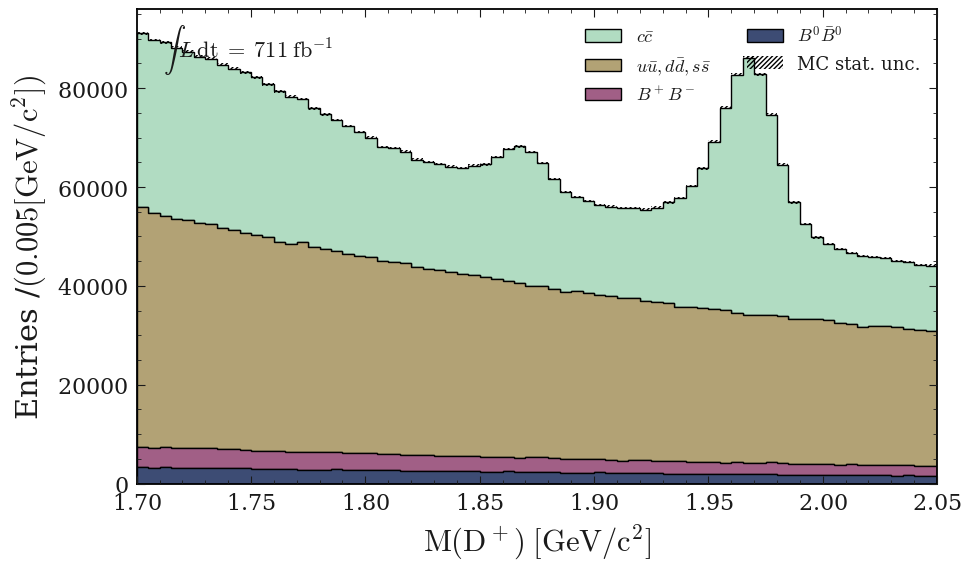

In [212]:
var = 'Dp_M'
data  = [pd_mixed[var], pd_charged[var],pd_uubar[var], pd_ccbar[var]]  
xrange = (1.67,2.1)
xrange = (1.7,2.05)

nbins = 70
xlabel = "$\mathrm{M(D^+)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step0.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv1_DpM.png"
img_path = plot_directory + "/b2bii_Dpetapip_gg_loose_v0_all.png"
# img_path = plot_directory + "/b2bii_Dpetapip_gg_loose_v0_all_nontag.png"

# img_path = plot_directory + "/test.png"

# plt.ylim(0,150000)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path="")
# plt.ylim(0,90000)
# plt.savefig(img_path)


[0.000000e+00 6.775033e+06 0.000000e+00 1.690650e+05 2.755000e+04
 5.373000e+03 1.208000e+03 2.760000e+02 7.100000e+01 2.300000e+01
 8.000000e+00 3.000000e+00]
fitst_bin_entries=0.0


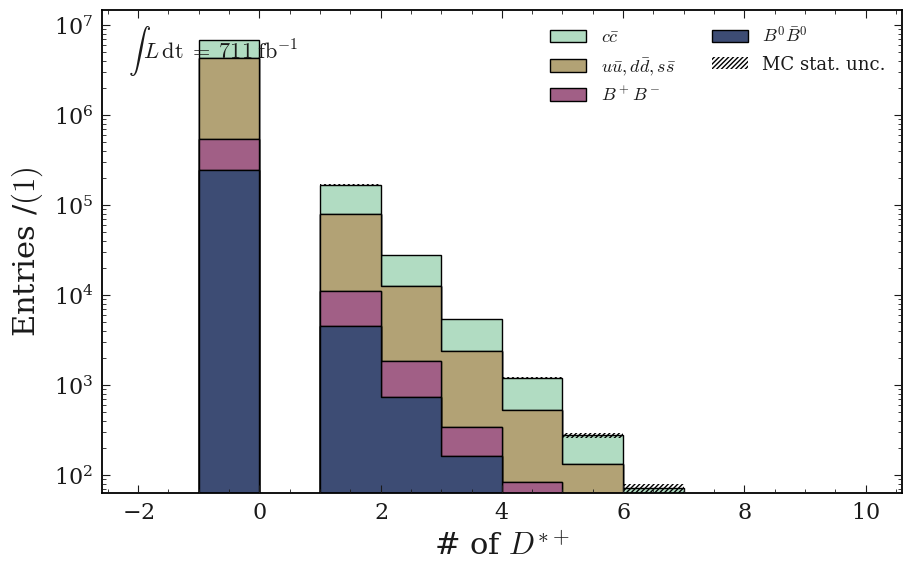

In [213]:
var = 'num_Dstar_no_nan'
data  = [pd_mixed[var], pd_charged[var],pd_uubar[var], pd_ccbar[var]]  
xrange = (1.67,2.1)
xrange = (-2,10)
nbins = 12
xlabel = r"# of $D^{*+}$"
unit = ""

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step0.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv1_DpM.png"
img_path = plot_directory + "/b2bii_Dpetapip_gg_loose_v0_all_num_Dstar_no_nan.png"

img_path = plot_directory + "/test.png"

# plt.ylim(0,150000)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path="",unit=unit)
# plt.ylim(0,90000)
plt.yscale("log")
# plt.tight_layout()
# plt.savefig(img_path)


In [214]:
cut = 'Dp_M>0.0'
cut += ' & num_Dstar_no_nan<0'


# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'v

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_charged, pd_mixed = cut_dfs_4types(cut, pd_ccbar, pd_uubar,pd_charged, pd_mixed)

[88491. 87122. 86796. 85690. 84881. 83908. 83427. 82364. 81594. 80875.
 79813. 78486. 77051. 75955. 75537. 73730. 72494. 71318. 70238. 68983.
 67904. 66162. 65933. 65037. 63514. 63042. 62613. 62066. 61753. 62186.
 62363. 63583. 64791. 65212. 64084. 62249. 59319. 57039. 56162. 55415.
 54630. 54388. 54089. 54142. 53776. 54258. 55250. 56219. 58489. 62057.
 67364. 74076. 80734. 83981. 80622. 72652. 62721. 55348. 51030. 48342.
 47087. 46027. 45393. 44629. 44563. 44397. 43722. 43575. 42884. 42760.]
fitst_bin_entries=88491.0


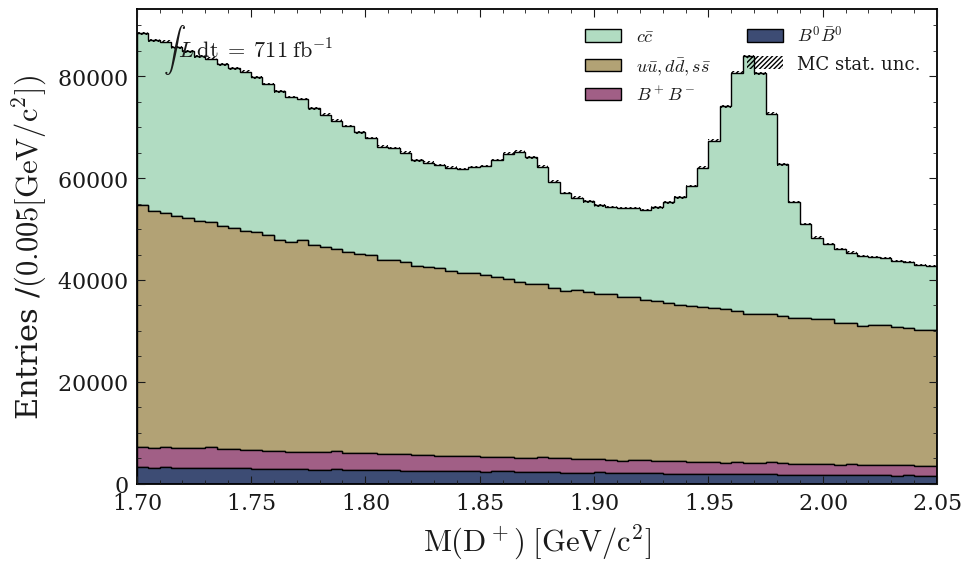

In [215]:
var = 'Dp_M'
data  = [pd_mixed[var], pd_charged[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.7,2.05)
nbins = 70
xlabel = "$\mathrm{M(D^+)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step1.png"
img_path = plot_directory + "/b2bii_Dpetapip_gg_loose_v0_step1_Dstartag_yestag.png"
img_path = plot_directory + "/b2bii_Dpetapip_gg_loose_v0_step1_Dstartag_nontag.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

In [182]:
cut = 'Dp_M>0.0'
cut += ' & abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7'
# cut += ' & Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1'
cut += ' & Dp_isSignal==1'

# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'v

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_charged, pd_mixed = cut_dfs_4types(cut, pd_ccbar, pd_uubar,pd_charged, pd_mixed)

[2.000e+00 3.000e+00 3.000e+00 1.000e+00 2.000e+00 3.000e+00 3.000e+00
 0.000e+00 4.000e+00 4.000e+00 8.000e+00 5.000e+00 8.000e+00 7.000e+00
 2.000e+01 1.800e+01 3.200e+01 4.900e+01 9.100e+01 1.750e+02 2.640e+02
 5.320e+02 8.930e+02 1.456e+03 1.587e+03 1.186e+03 5.100e+02 2.010e+02
 7.500e+01 3.100e+01 1.500e+01 9.000e+00 1.000e+01 4.000e+00 3.000e+00
 1.000e+00 4.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.000e+00 2.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
 0.000e+00]
fitst_bin_entries=2.0


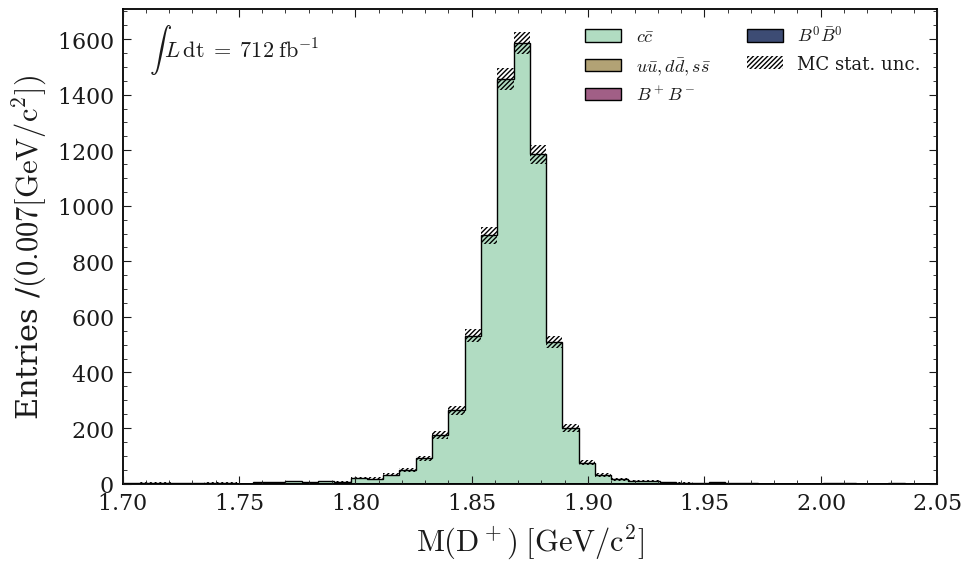

In [183]:
var = 'Dp_M'
data  = [pd_mixed[var], pd_charged[var],pd_uubar[var], pd_ccbar[var]]  
xrange = (1.7,2.05)
nbins = 50
xlabel = "$\mathrm{M(D^+)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step2.png"
img_path = plot_directory + "/b2bii_Dpetapip_gg_loose_v0_step2_eta_angle_cuts.png"
img_path = plot_directory + "/b2bii_Dpetapip_gg_loose_v0_step2_eta_angle_cuts_nontag.png"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv0_DpM.png"

img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[723. 264. 212. 180. 170. 173. 148. 136. 112. 120. 114. 107. 108. 134.
  94.  94.  93.  98.  98.  83.  97.  85.  91.  92.  89. 100.  80. 101.
  87.  78.  80. 104.  87.  97.  86.  96. 108. 102. 104. 103.  99. 123.
 122. 134. 151. 177. 179. 217. 280. 627.]
fitst_bin_entries=723.0


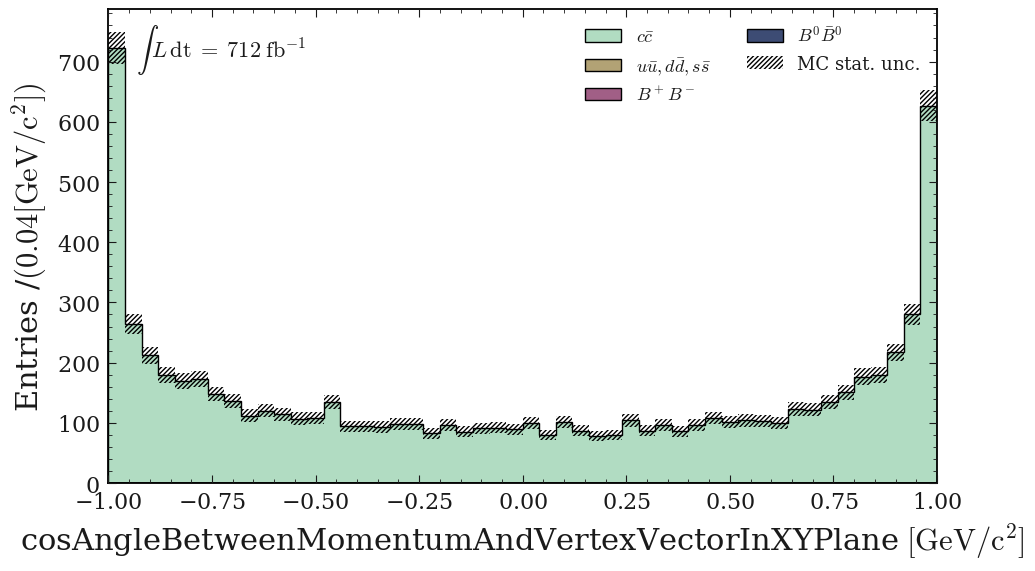

In [184]:
var = 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane'
data  = [pd_mixed[var], pd_charged[var],pd_uubar[var], pd_ccbar[var]]  
xrange = (-1,1)
nbins = 50
xlabel = "cosAngleBetweenMomentumAndVertexVectorInXYPlane"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step2.png"
# img_path = plot_directory + "/b2bii_Dpetapip_gg_loose_v0_step2_eta_angle_cuts.png"
# img_path = plot_directory + "/b2bii_Dpetapip_gg_loose_v0_step2_eta_angle_cuts_nontag.png"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv0_DpM.png"

img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[1568. 1605. 1689. 1712. 1758. 1857. 1885. 1954. 2067. 2054. 2126. 2057.
 2235. 2303. 2280. 2390. 2402. 2373. 2354. 2323. 2340. 2359. 2348. 2349.
 2361. 2305. 2352. 2419. 2456. 2430. 2464. 2503. 2686. 2604. 2651. 2847.
 2794. 2892. 2887. 2996. 3006. 3138. 3170. 3177. 3196. 3100. 3062. 2893.
 2663. 2258.]
fitst_bin_entries=1568.0


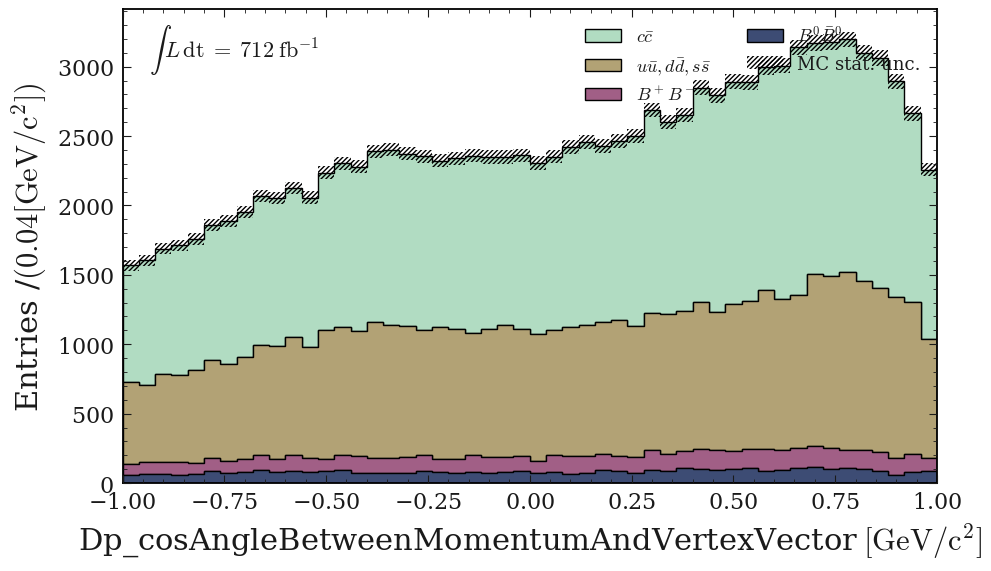

In [132]:
var = 'Dp_cosAngleBetweenMomentumAndVertexVector'
data  = [pd_mixed[var], pd_charged[var],pd_uubar[var], pd_ccbar[var]]  
xrange = (-1,1)
nbins = 50
xlabel = "Dp_cosAngleBetweenMomentumAndVertexVector"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step2.png"
# img_path = plot_directory + "/b2bii_Dpetapip_gg_loose_v0_step2_eta_angle_cuts.png"
# img_path = plot_directory + "/b2bii_Dpetapip_gg_loose_v0_step2_eta_angle_cuts_nontag.png"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv0_DpM.png"

img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

## FOM

In [65]:
pd_ccbar_bkg = pd_ccbar.query('Dp_isSignal!=1')
pd_all = pd.concat([pd_ccbar_bkg,
                    pd_uubar,
                    # pd_ddbar,
                    # pd_ssbar,
                    pd_charged,
                    pd_mixed], ignore_index=True)

# pd_all = pd_ccbar

In [66]:
def calculate_FOM( bkg_pd, sig_pd, cut_list, scale_factor, cut):
    
    FOM_list = list()
    
    for cut_value in cut_list:
    
        temp_cut = cut + str(cut_value) 
        temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        nbkg = len(temp_bkg_pd)

#         FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))

        FOM_list.append(FOM)    
    
    return FOM_list

In [67]:
def calculate_eff( bkg_pd, sig_pd, cut_list, cut):
    
    eff_list = list()
    
    for cut_value in cut_list:
    
        #temp_cut = 'gamma_E > ' + str(cut_value) 
        temp_cut = cut + str(cut_value) 

        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)

        eff = nsig/(0.5*1e+6)
        eff_list.append(eff)    
    
    return eff_list

In [68]:
def calculate_purity( bkg_pd, sig_pd, cut_list, cut):
    
    purity_list = list()
    
    for cut_value in cut_list:
    
        #temp_cut = 'gamma_E > ' + str(cut_value) 
        temp_cut =  cut +  str(cut_value) 
        
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        
        nREALsig = len(temp_sig_pd.query("Dp_isSignal==1"))
        
        #nbkg = len(temp_bkg_pd)

        purity = nREALsig/nsig
        purity_list.append(purity)    
    
    return purity_list

In [69]:
def plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list, xlabel ,offset=85):


    fig, host = plt.subplots(figsize=(9,6)) # (width, height) in inches    
    par1 = host.twinx()
    # par2 = host.twinx()

    #host.set_xlim(2, 3.5)
    # host.set_ylim(0, 2)
    # par2.set_ylim(0, 4)
    #par1.set_ylim(0,0.16 )
    # par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                            # offset=(offset, 0))
    # par2.axis["right"].toggle(all=True)

    host.set_xlabel(xlabel)
    host.set_ylabel("FOM")
    par1.set_ylabel("Efficiency")
    # par2.set_ylabel("Purity")

    # color1 = plt.cm.viridis(0)
    # color2 = plt.cm.viridis(0.5)
    # color3 = plt.cm.viridis(.9)
    color1 = 'r'
    color2 = 'g'
    color3 = 'b'

    p1, = host.plot(FOM_cut_list, FOM_phig_list,    color=color1, label="FOM")
    p2, = par1.plot(FOM_cut_list, eff_phig_list,    color=color2, label="Efficiency")
    # p3, = par2.plot(FOM_cut_list, purity_phig_list, color=color3, label="Purity")

    
    # lns = [p1, p2, p3]
    lns = [p1, p2]

    host.legend(handles=lns, loc='best')
    # right, left, top, bottom
    offset = offset
    # par2.spines['right'].set_position(('outward', offset))

    # no x-ticks                 
    # par2.xaxis.set_ticks([])

    # Sometimes handy, same for xaxis
    # par2.yaxis.set_ticks_position('right')

    # Move "Velocity"-axis to the left
    # par2.spines['left'].set_position(('outward', 60))
    # par2.spines['left'].set_visible(True)
    # par2.yaxis.set_label_position('left')
    # par2.yaxis.set_ticks_position('left')

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    # par2.yaxis.label.set_color(p3.get_color())

    plt.title(r'$D^+ \to \eta_{\gamma\gamma} \gamma$')
    # plt.axvline(x=2.45,  color='orange', linestyle='dotted')

    # Adjust spacings w.r.t. figsize
    fig.tight_layout()

In [70]:
def calculate_FOM_3D(bkg_pd, sig_pd, grid_list, scale_factor, cut_x, cut_y, cut_z):
 
    FOM_list = list()
    
    for points_3d in grid_list:
        
        points_3d_x, points_3d_y, points_3d_z =  points_3d[0], points_3d[1], points_3d[2]
    
        temp_cut = cut_x + str(points_3d_x) + ' & ' +  cut_y + str(points_3d_y) + ' & ' + cut_z + str(points_3d_z) 
        temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)    
        
        nsig = len(temp_sig_pd)
        nbkg = len(temp_bkg_pd)
        # print(str(scale_factor*nsig + nbkg) + ' nsig=' + str(nsig) + ', nbkg=' + str(nbkg) + ', cut=' + temp_cut )
#         FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM_list.append(FOM)    
        
    return FOM_list

In [71]:
# # sigMC_file_loc = base_file_loc + 'topo/resultfile/result_phi/standard.root'
# sigMC_file_loc = base_file_loc + '/*ccbar.root'

# base_filter=' num_Dstar_no_nan>0 && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 && etapip_Eta_daughterAngle_0_1<1.7'
# # base_filter += '&& nSigCascDcyBr_0==1'
# base_filter += '&& Dp_isSignal==1'
# # base_filter+='&& abs(D0_cosHel_0)<0.8'

# # base_filter += '&& gamma_E>0.48'

# # variables=['D0_M','D0_cosHel_0','Phi_M','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','gamma_E']
# tree='etapip_gg'

pd_ccbar_signal = pd_ccbar.query('Dp_isSignal==1')

# pd_ccbar_signal = get_pd(file=sigMC_file_loc, tree=tree,base_filter=base_filter,variables=variables)
print(len(pd_ccbar_signal))

7179


In [72]:
# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_v26_half1M_1_pre_ext_signalMC_recon_mdst_phi.root'
# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_phi_*.root'
half_1_sigMC = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_gg/240828_loose_v0_roe_Dptag/*.root'
# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# base_filter='D0_M>1.8 && D0_M<1.9'
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001  && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001  && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5'

# base_filter += '&& Dstarp_isSignal==1'

# # base_filter += '&& gamma_E>0.48'

# base_filter = 'num_Dstar_no_nan>0 && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 && etapip_Eta_daughterAngle_0_1<1.7 & Dp_isSignal==1'
# pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)


pd_half_1_sigMC = pd_ccbar_signal

scale_factor = len(pd_ccbar_signal)/len(pd_half_1_sigMC)
print(scale_factor)

1.0


In [73]:
list(pd_ccbar)

['__experiment__',
 '__run__',
 '__event__',
 'Dp_M',
 'Dp_isSignal',
 'Dp_CMS_p',
 'Dp_cosAngleBetweenMomentumAndVertexVector',
 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'Dp_acos_cosAngleBetweenMomentumAndVertexVector',
 'Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'etapip_Eta_M',
 'etapip_Eta_isSignal',
 'etapip_Eta_daughterDiffOfPhi_0_1',
 'etapip_Eta_daughterAngle_0_1',
 'etapip_Eta_Easym',
 'etapip_Eta_p',
 'etapip_gamma1_p',
 'etapip_gamma2_p',
 'etapip_gamma1_clusterNHits',
 'etapip_gamma2_clusterNHits',
 'etapip_gamma1_clusterReg',
 'etapip_gamma2_clusterReg',
 'Pip_pionID',
 'Pip_mcPDG',
 'Pip_dr',
 'Pip_p',
 'ROE_Mgg',
 'dM_pi0',
 'ROE_Mgg_50MeV',
 'dM_pi0_50MeV',
 'ROE_Mgg_75MeV',
 'dM_pi0_75MeV',
 'ROE_Mgg_2',
 'dM_pi0_2',
 'ROE_Mgg_50MeV_2',
 'dM_pi0_50MeV_2',
 'ROE_Mgg_75MeV_2',
 'dM_pi0_75MeV_2',
 'veto_isSignal',
 'veto_isSignal_50MeV',
 'veto_isSignal_75MeV',
 'num_Dstar',
 'num_Dstar_no_nan']

In [ ]:
X, Y, Z = np.mgrid[0.99950:0.99999:99j, 0.4:1.4:101j, 0.4:0.6:21j]
a = zip(X.ravel(), Y.ravel(), Z.ravel())
A_list = list(a)

grid_list = A_list
cut_x = 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane > '
cut_y = 'etapip_Eta_p > '
cut_z = 'Pip_p > '

scale_factor=scale_factor

FOM_phig_list = calculate_FOM_3D(pd_all,pd_half_1_sigMC, grid_list ,scale_factor, cut_x,  cut_y, cut_z )


In [ ]:
# # Number to be equally divided
# number_to_divide = 2

# # Update each element in the list
# for i in range(len(FOM_phig_list)):
#     FOM_phig_list[i] = FOM_phig_list[i]/number_to_divide


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# scat = ax.scatter(X, Y, Z, c=T.flatten(), alpha=0.5)
scat = ax.scatter(X, Y, Z, c=FOM_phig_list, alpha=0.5, cmap = 'jet')
# scat = ax.scatter(X, Y, Z, c=FOM_phig_list, alpha=0.5)

fig.colorbar(scat, shrink=0.5, aspect=5 , pad = 0.1)

ax.set_xlabel(r'$\cos XY$ cut',fontsize=17)
#ax.set_ylabel(r'Second FBDT cut',fontsize=17)
ax.set_ylabel(r'$\eta$ p',fontsize=17)
ax.set_zlabel(r'$\pi^+$ p',fontsize=17)
ax.tick_params(axis='both', which='major', labelsize=13)

# Set axis ranges to their full extent
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())


# ax.ticklabel_format(axis = 'z',  style='sci', scilimits = (0,1))
# ax.dist = 10
ax.xaxis.labelpad=8
ax.yaxis.labelpad=12
ax.zaxis.labelpad=15.5


plt.tight_layout()
# plt.savefig('/media/jykim/T7/saved_plots/FOM/MC15rd_Eg_Mgg_FBDT2_phi_opt.png')
plt.show()

In [33]:
#base_filter+='&& abs(D0_cosHel_0)<0.8'

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=50.63039825544764, cut value=(0.01, 0.6, 0.41000000000000003)


In [37]:
#base_filter+='&& abs(D0_cosHel_0)<0.8'

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=52.77986106727667, cut value=(0.015, 0.7, 0.42000000000000004)


In [70]:
#base_filter+='&& abs(D0_cosHel_0)<0.8'

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=53.27808175308169, cut value=(0.9998, 0.8, 0.43)


In [ ]:
#base_filter+='&& abs(D0_cosHel_0)<0.8'

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=18.18392412678266, cut value=0.77


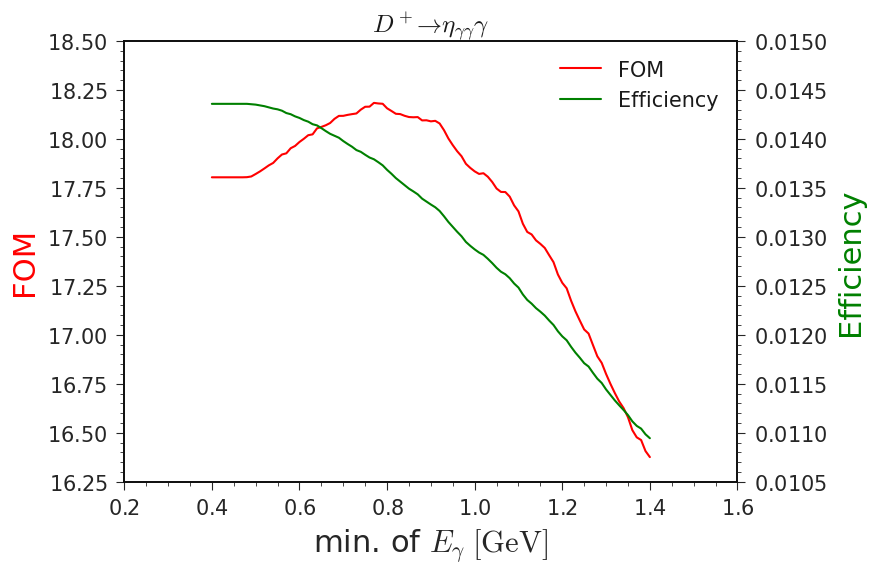

In [74]:
FOM_cut_list = np.linspace(0.4,1.4,101)
cut = 'etapip_Eta_p > '

# FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor*0.5, cut = cut  )



purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
# plt.axvline(x=0.48,  color='magenta', linestyle='dotted',lw=2)

# plt.savefig("MC15ri_omega_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=19.66126209462801, cut value=0.54


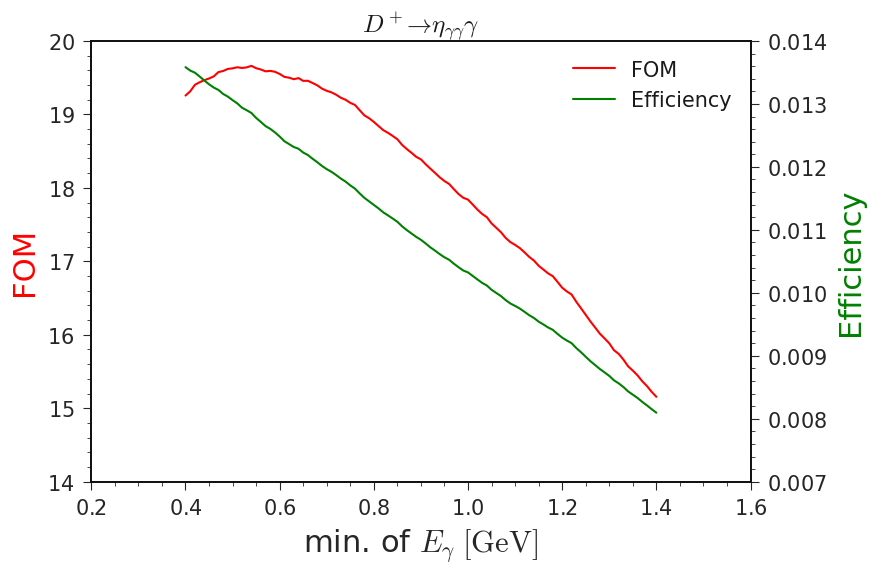

In [75]:
FOM_cut_list = np.linspace(0.4,1.4,101)
cut = 'Pip_p > '

# FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor*0.5, cut = cut  )



purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
# plt.axvline(x=0.48,  color='magenta', linestyle='dotted',lw=2)

# plt.savefig("MC15ri_omega_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=12.323920545082789, cut value=0.0


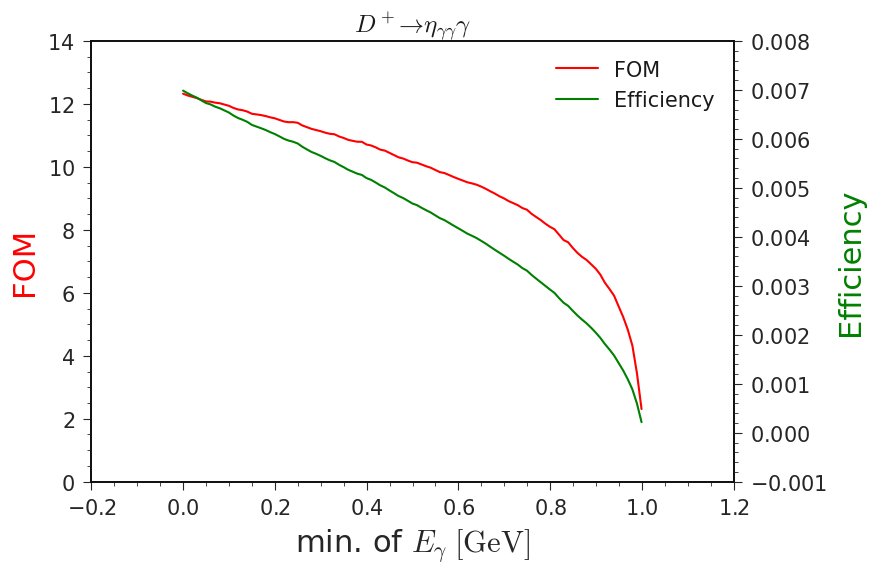

In [80]:
FOM_cut_list = np.linspace(0.99950,0.99999,49*2+1)
FOM_cut_list = np.linspace(0.,0.999,101)

cut = 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane > '

# FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor*0.5, cut = cut  )



purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
# plt.axvline(x=0.48,  color='magenta', linestyle='dotted',lw=2)

# plt.savefig("MC15ri_omega_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))